# Multiple Linear Regression

In [9]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("/Users/cameronlooney/Documents/Linear Regression/ad_data_mlr.csv")

In [4]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


## Visual the Data

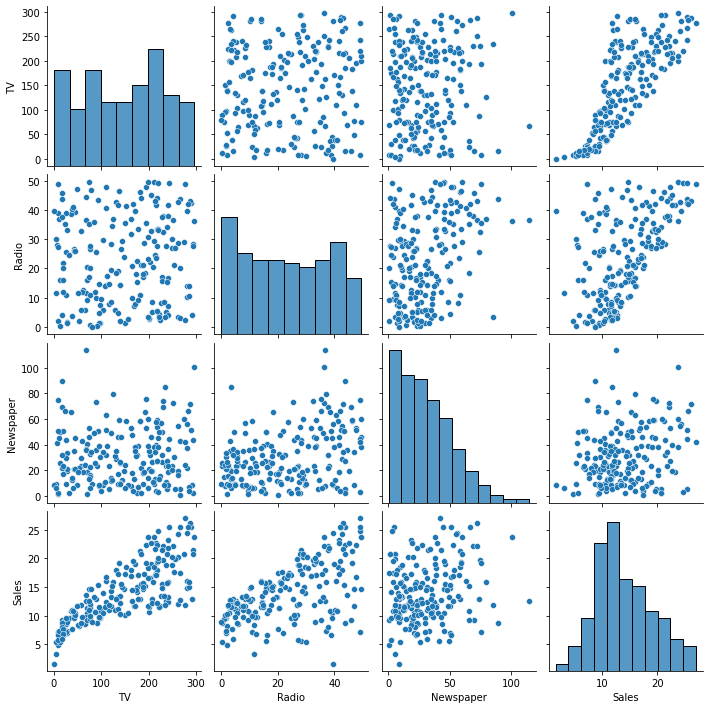

In [11]:
sns.pairplot(df)

/Users/cameronlooney/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


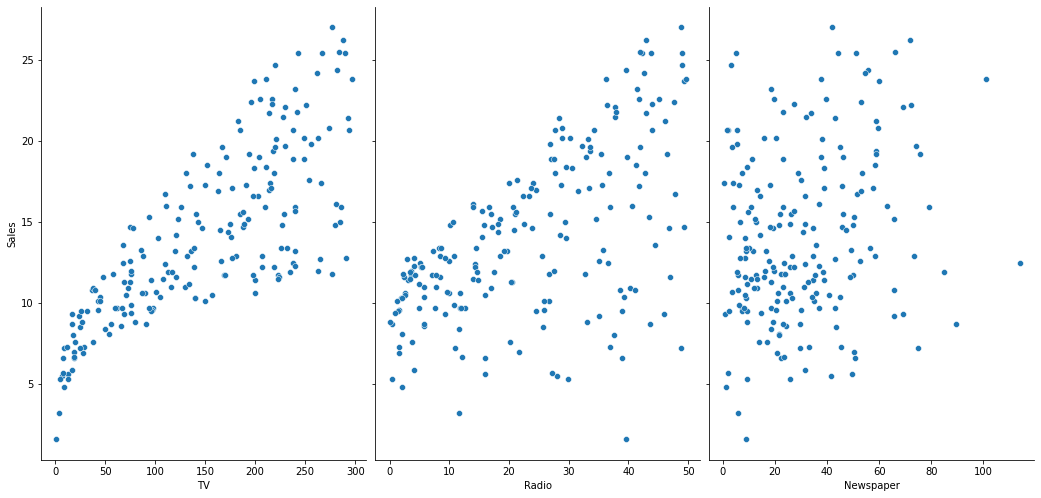

In [12]:
# Visualise the relationship between the features and the response using scatterplots
sns.pairplot(df, x_vars=['TV','Radio','Newspaper'], y_vars='Sales',size=7, aspect=0.7, kind='scatter')

## Split the Data for Train / Test

In [14]:
# Putting feature variable to X
X = df[['TV','Radio','Newspaper']]

# Putting response variable to y
y = df['Sales']

In [19]:
#random_state is the seed used by the random number generator, it can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 , random_state=100)

In [20]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

## Evaluate Model

In [23]:
# print the intercept
# Print the intercept and coefficients
print(lm.intercept_)
# Let's see the coefficient
coeff_df = pd.DataFrame(lm.coef_,X_test.columns,columns=['Coefficient'])
coeff_df

2.652789668879498


,Coefficient
TV,0.045426
Radio,0.189758
Newspaper,0.004603


## Understanding results
For a 1 unit increasing in TV advertising results in 0.045 increase in sales <br>
For a 1 unit increasing in Radio advertising results in 0.189 increase in sales <br>
For a 1 unit increasing in Newspapers advertising results in 0.00 increase in sales<br>

## Predictions and Calculating Error

In [35]:

from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import sklearn.metrics as metrics
import numpy as np
def regression_results(X_train,y_train, X_test, y_test):
    '''
    Custom Function to generate a Regression Summary Report for Regression (Similar to R)
    '''
    # Regression metrics
    y_pred = lm.predict(X_test)
    explained_variance=metrics.explained_variance_score(y_test, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_test, y_pred) 
    mse=metrics.mean_squared_error(y_test, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_test, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_test, y_pred)
    r2=metrics.r2_score(y_test, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

    
    # Summary for P-values
    X_train_sm = X_train
    #Unlike SKLearn, statsmodels don't automatically fit a constant, 
    #so you need to use the method sm.add_constant(X) in order to add a constant. 
    X_train_sm = sm.add_constant(X_train_sm)
    # create a fitted model in one line
    lm_1 = sm.OLS(y_train,X_train_sm).fit()

    # print the coefficients
    lm_1.params
    print(lm_1.summary())
regression_results(X_train,y_train, X_test, y_test)


explained_variance:  0.9162
mean_squared_log_error:  0.0156
r2:  0.9059
MAE:  1.0638
MSE:  1.8507
RMSE:  1.3604
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     377.6
Date:                Mon, 11 Jul 2022   Prob (F-statistic):           9.97e-66
Time:                        11:41:58   Log-Likelihood:                -280.83
No. Observations:                 140   AIC:                             569.7
Df Residuals:                     136   BIC:                             581.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------

We see that newspaper is insignificant and can be dropped as it doesnt add to the model

<AxesSubplot:>

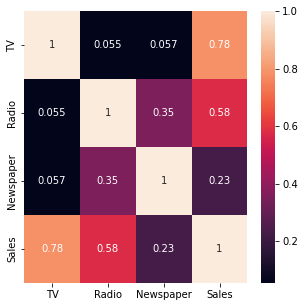

In [37]:
plt.figure(figsize = (5,5))
sns.heatmap(df.corr(),annot = True)

## Iterating Model

Drop insignificant columns and re run the model

In [38]:
# Removing Newspaper from our dataset
X_train_new = X_train[['TV','Radio']]
X_test_new = X_test[['TV','Radio']]
# Model building
lm.fit(X_train_new,y_train)
# Making predictions
y_pred_new = lm.predict(X_test_new)

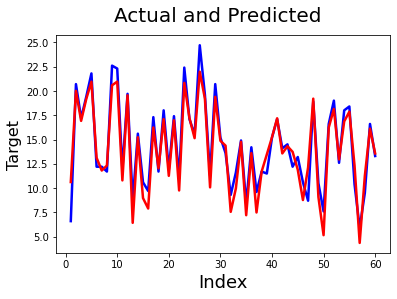

In [39]:
def actual_vs_predicted(y_test,y_pred):
    c = [i for i in range(1,61,1)]
    fig = plt.figure()
    plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                               # X-label
    plt.ylabel('Target', fontsize=16)   
    
actual_vs_predicted(y_test,y_pred)

In [40]:
regression_results(X_train_new, y_train, X_test_new,y_test)

explained_variance:  0.9188
mean_squared_log_error:  0.0155
r2:  0.9092
MAE:  1.0398
MSE:  1.7847
RMSE:  1.3359
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     568.8
Date:                Mon, 11 Jul 2022   Prob (F-statistic):           4.46e-67
Time:                        11:46:51   Log-Likelihood:                -281.03
No. Observations:                 140   AIC:                             568.1
Df Residuals:                     137   BIC:                             576.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------